In [181]:
import numpy as np
import pandas as pd

import matplotlib
#%matplotlib notebook
from matplotlib import pyplot as plt

import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figure!


sns.set() # better looking figs



In [13]:
df = pd.read_csv("questionnaire-answers-per-clip.csv")
df

,Unnamed: 0,clipName,pptID,condition,gettingOnWell,relationshipBetweenCharacters,workingTogether,leftDominant,rightDominant,leftCooperative,...,leftFearful,rightFearful,leftSad,rightSad,leftContent,rightContent,leftAngry,rightAngry,leftAmused,rightAmused
0,0,1Laugh1PushAway,55,4,0.0,0.0,0.0,4.0,4.0,4.0,...,3.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0
1,1,1Laugh1PushAway,87,4,1.0,0.0,2.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0
2,2,1Laugh1PushAway,118,2,0.0,0.0,0.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,3.0
3,3,1Laugh1PushAway,136,2,2.0,0.0,2.0,1.0,3.0,1.0,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0
4,4,1Laugh1PushAway,417,4,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0
5,5,1Laugh1PushAway,681,4,1.0,1.0,2.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,4.0,2.0
6,6,1Laugh1PushAway,695,4,0.0,0.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,3.0
7,7,1Laugh1PushAway,1031,4,2.0,2.0,2.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0,3.0,1.0
8,8,1Laugh1PushAway,1315,4,1.0,0.0,0.0,0.0,4.0,0.0,...,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,1.0
9,9,1Laugh1PushAway,1460,2,0.0,0.0,0.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,4.0


## PCA for dimensionality reduction

In [14]:
from sklearn.decomposition import PCA

In [182]:
training_df=df[df["condition"]==2] # skeleton only
training=training_df.T.iloc[4:].T.values
training_means=training_df.groupby(["clipName"]).mean().T.iloc[3:].T
training_labels=training_df["clipName"].values

testing_df=df[df["condition"]==4] # full scene
testing=testing_df.T.iloc[4:].T.values
testing_means=testing_df.groupby(["clipName"]).mean().T.iloc[3:].T
testing_labels=testing_df["clipName"].values

In [183]:
training.shape

(276, 25)

In [184]:
pca=PCA(n_components=6)
pca.fit(training)

training_pca = pca.transform(training)
training_means_pca = pca.transform(training_means.values)

testing_pca = pca.transform(testing)
testing_means_pca = pca.transform(testing_means.values)

## Plotting of the embeding

`plot_embedding` plots each questionnaire's response when projected along the first 2 eigenvectors. Responses' colours correspond to the clips.

In [185]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
def plot_embedding(X, labels, means=None, means_labels=None, three_d=False):

    plt.figure()
    
    colors = [list(set(labels)).index(l) for l in labels]
    if means_labels is not None:
        colors_means = [sns.color_palette("tab20",20)[list(set(labels)).index(l)] for l in means_labels]
    
    handles=[]
    if three_d:
        ax = plt.subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:,2], marker="o", c=colors, label=labels, cmap=plt.get_cmap("tab20"))
        ax.set_zlabel('3rd component')
        
        if means is not None:
            for i in range(means.shape[0]):
                points=ax.scatter(means[i, 0], means[i, 1], means[i,2], marker="o", s=200, c=colors_means[i], label=means_labels[i])
                handles.append(points)
            
    else:
        ax = plt.subplot(111)
        ax.scatter(X[:, 0], X[:, 1], marker="o", c=colors, label=labels[:], cmap=plt.get_cmap("tab20"))
        
        if means is not None:
            for i in range(means.shape[0]):
                points=ax.scatter(means[i, 0], means[i, 1], marker="o", s=200, c=colors_means[i], label=means_labels[i])
                handles.append(points)
            

    ax.set_xlabel('1st component')
    ax.set_ylabel('2nd component')

    if means is not None:
        ax.legend(handles, means_labels, loc=1, prop=fontP)
        
def plot_compare_embeddings(X, Y, labels, three_d=False):

    plt.figure()
    
    colors = [sns.color_palette("tab20",20)[list(labels).index(l)] for l in labels]
    
    handles=[]
    
    if three_d:
        ax = plt.subplot(111, projection='3d')
        
        for i in range(X.shape[0]):
            points=ax.scatter(X[i, 0], X[i, 1], X[i,2], marker="o", s=200, c=colors[i], label=labels[i])
            handles.append(points)
            points=ax.scatter(Y[i, 0], Y[i, 1], Y[i,2], marker="x", s=200, c=colors[i], label=labels[i])
            
            ax.plot((X[i,0], Y[i,0]), (X[i,1], Y[i,1]), (X[i,2], Y[i,2]), '-',c=colors[i])
            
        ax.set_zlabel('3rd component')
        #ax.set_zlim(-3,3)
            
    else:
        ax = plt.subplot(111)
        
        for i in range(X.shape[0]):
            points=ax.scatter(X[i, 0], X[i, 1], marker="o", s=200, c=colors[i], label=labels[i])
            handles.append(points)
            ax.scatter(Y[i, 0], Y[i, 1], marker="x", s=200, c=colors[i], label=labels[i])
            
            ax.plot((X[i,0], Y[i,0]), (X[i,1], Y[i,1]), '-',c=colors[i])
                       

    ax.set_xlabel('1st component')
    ax.set_ylabel('2nd component')
    
    #ax.set_xlim(-3,3)
    #ax.set_ylim(-3,3)
    

    ax.legend(handles, labels, loc='best', prop=fontP)
    ax.set_title("O: training (skeletons), X: testing (full scene)")
    

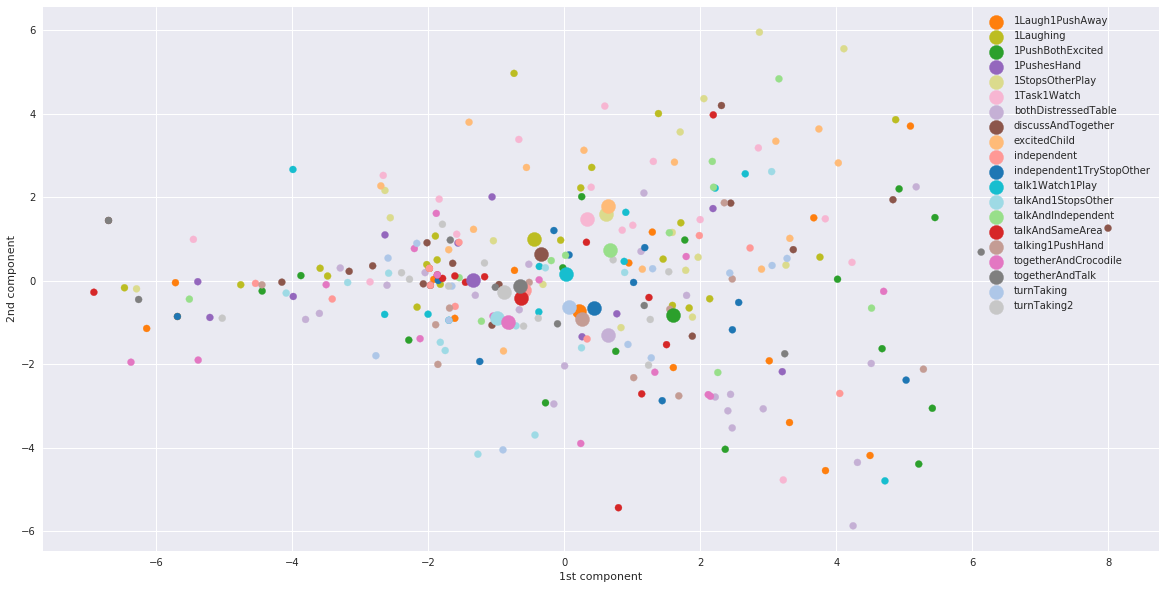

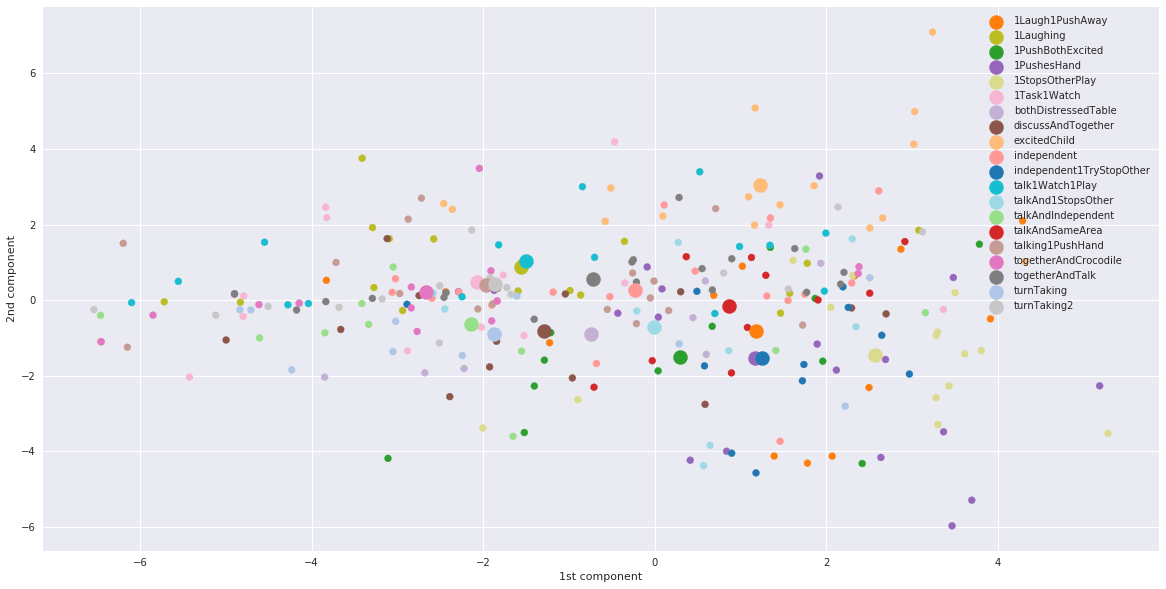

In [186]:
plot_embedding(training_pca, training_labels, training_means_pca, training_means.index, three_d=False) 
plot_embedding(testing_pca, testing_labels, testing_means_pca, testing_means.index, three_d=False)

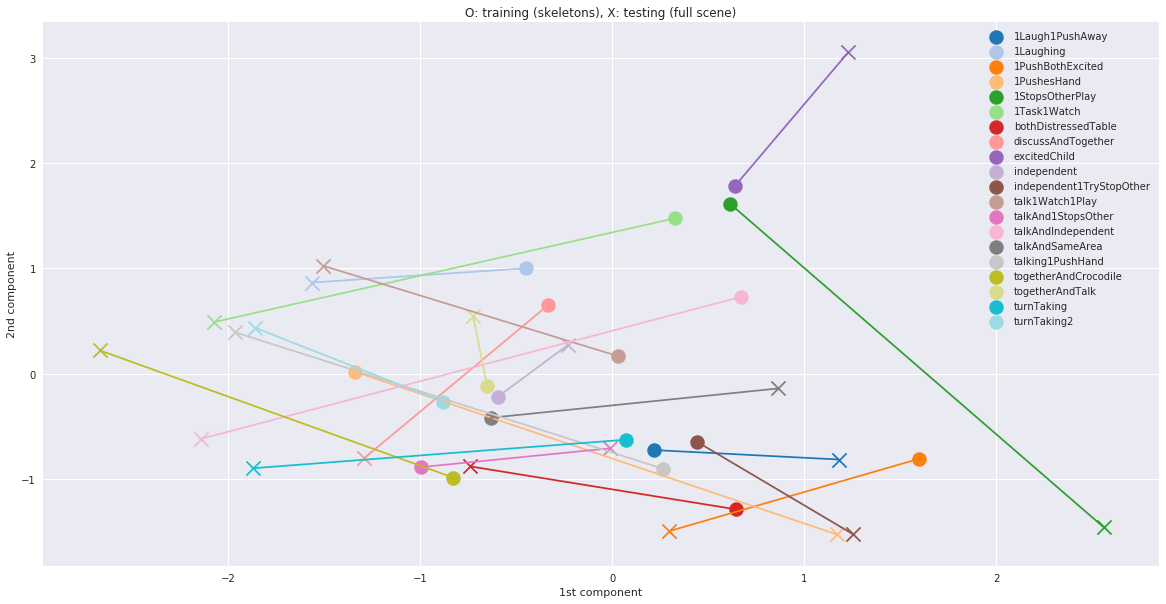

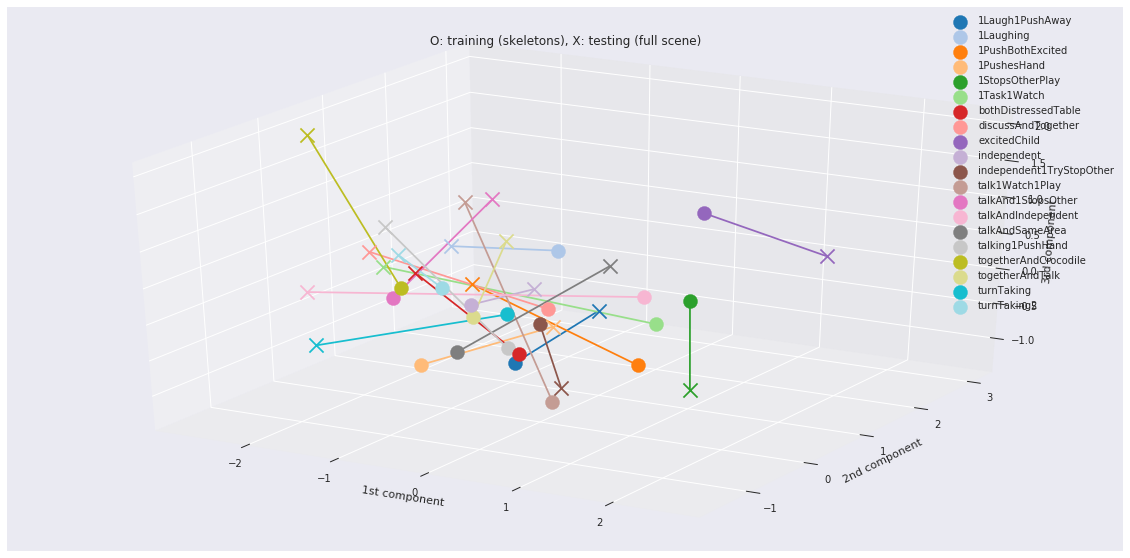

In [187]:
plot_compare_embeddings(training_means_pca, testing_means_pca, training_means.index,three_d=False)
plot_compare_embeddings(training_means_pca, testing_means_pca, training_means.index,three_d=True)

In [188]:
pca.explained_variance_ratio_.cumsum()

array([0.28405715, 0.41658333, 0.51708521, 0.57579546, 0.62923102,
       0.67070969])

In [189]:
pca.components_


array([[ 0.17548592,  0.15016615,  0.14538466,  0.05376097,  0.13633354,
        -0.21093684, -0.2386643 ,  0.17641636,  0.23302474, -0.21699709,
        -0.25971502,  0.19025137,  0.27863681, -0.15274028, -0.11062468,
         0.20882575,  0.18131997,  0.18626668,  0.16037721, -0.23449424,
        -0.24284952,  0.2457872 ,  0.30775015, -0.14672371, -0.16033606],
       [ 0.01357949,  0.01438256,  0.02452207,  0.42994249, -0.41896846,
        -0.18209335,  0.0747369 ,  0.32136526, -0.2173944 , -0.13951877,
         0.07173952,  0.3495939 , -0.24967575,  0.0014334 , -0.1105479 ,
        -0.21517212,  0.26782144, -0.12600513,  0.1804615 ,  0.07111757,
        -0.04827713,  0.15283523, -0.13380643,  0.10641266,  0.03883441],
       [-0.14391971, -0.11048205, -0.18594399,  0.05503047,  0.2185336 ,
         0.13508949,  0.12723342,  0.30134902,  0.27324022,  0.21053698,
         0.21047521,  0.22557171,  0.28653153,  0.08431671,  0.12230118,
         0.19236272,  0.16733776,  0.12434086,  0

## LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [190]:
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(training_pca, training_labels)

# we perform the LDA *on top of the PCA* as LDA typically requires O > 3 F, with O the nb of observations and F the nb of features (here, we have ~26 observations for originally 25 questions)
training_lda = lda.transform(pca.transform(training))
training_means_lda = lda.transform(pca.transform(training_means.values))

testing_lda = lda.transform(pca.transform(testing))
testing_means_lda = lda.transform(pca.transform(testing_means.values))


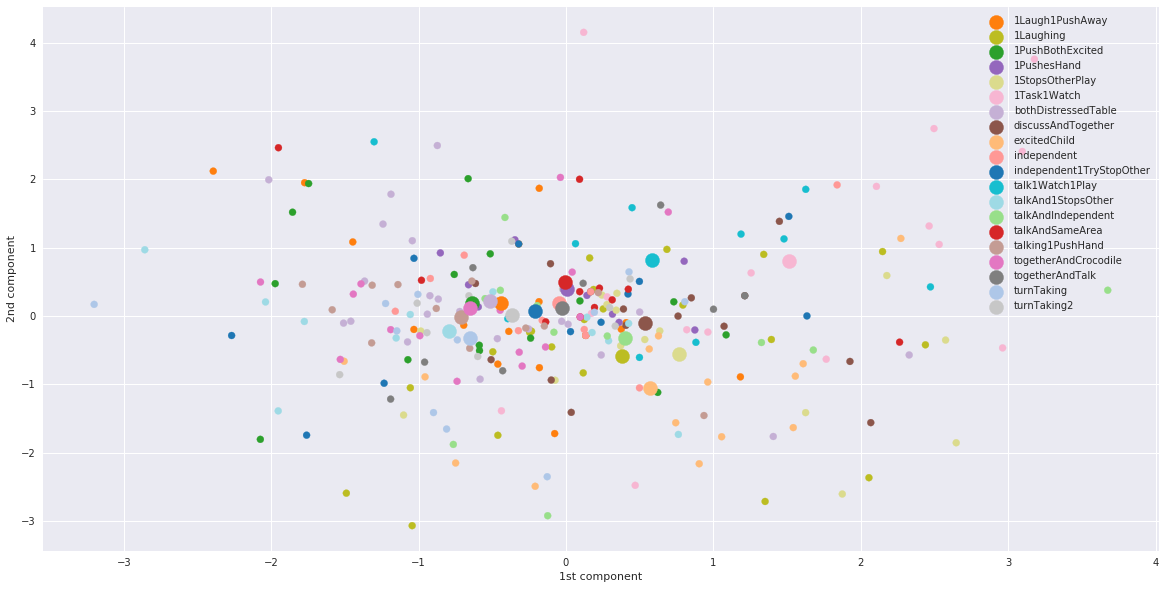

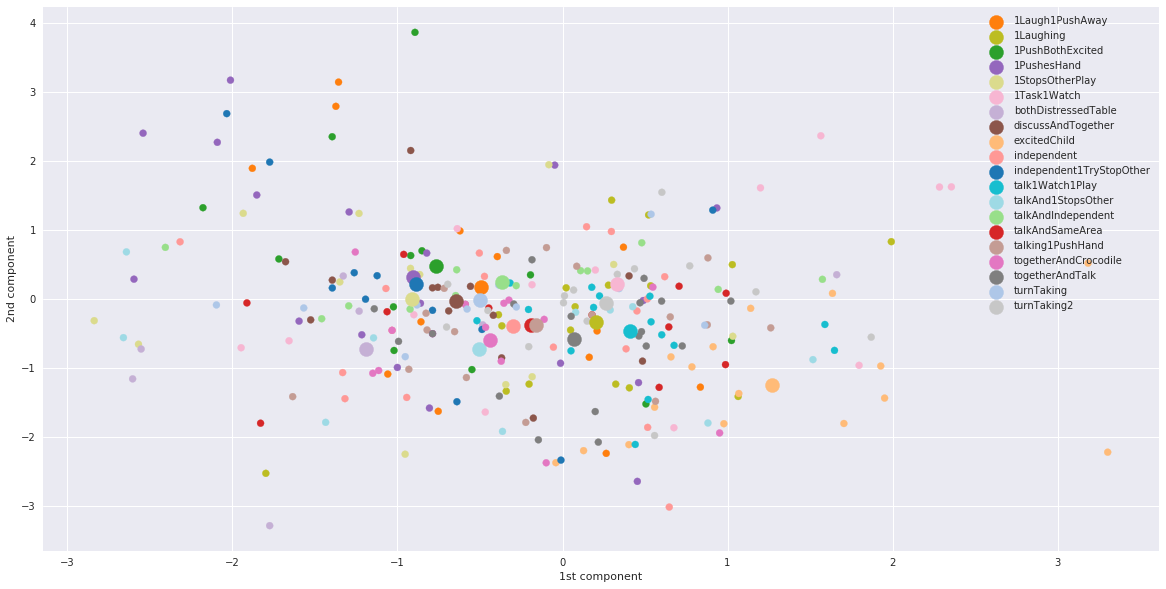

In [191]:
plot_embedding(training_lda, training_labels,training_means_lda, training_means.index, three_d=False)
plot_embedding(testing_lda, testing_labels,testing_means_lda, testing_means.index, three_d=False)

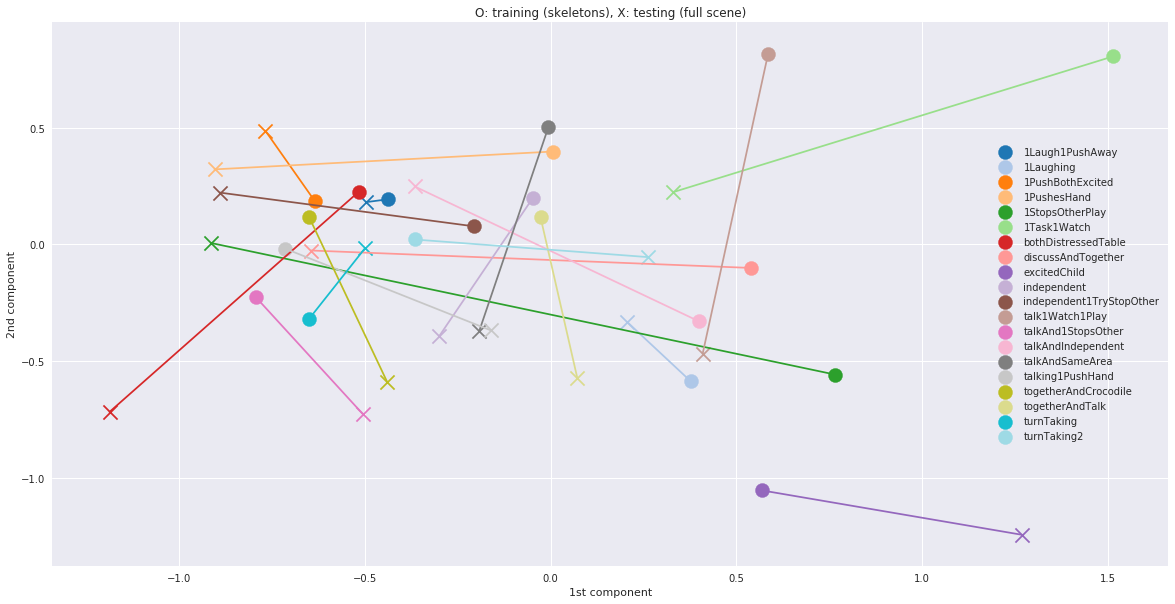

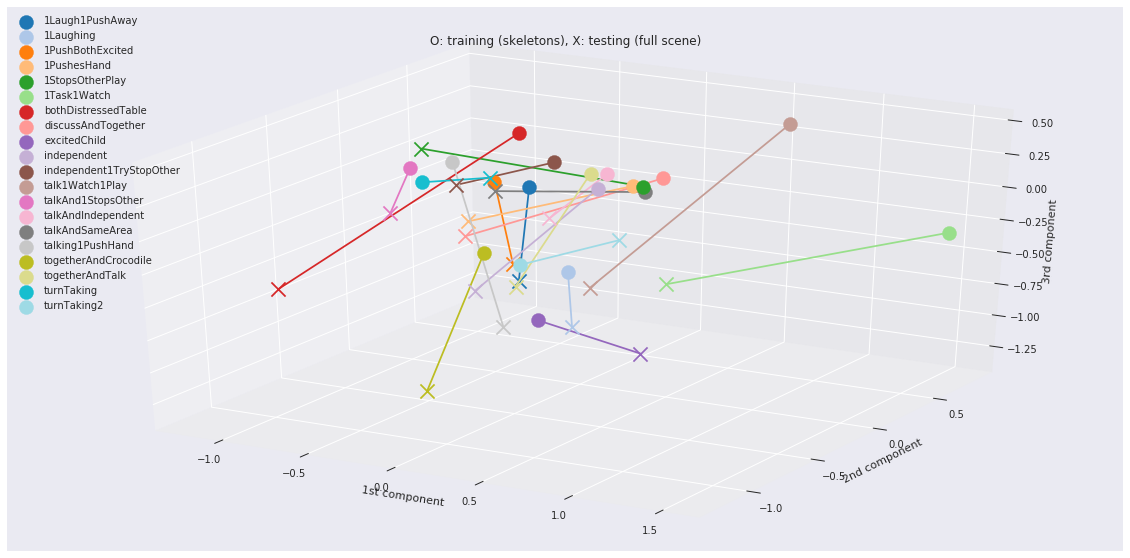

In [192]:
plot_compare_embeddings(training_means_lda, testing_means_lda, training_means.index,three_d=False)
plot_compare_embeddings(training_means_lda, testing_means_lda, training_means.index,three_d=True)

## Explorative Factor Analysis

In [193]:
import factor_analyzer


In [194]:
skel_factor_df=training_df.T.iloc[4:].T.astype(float)

fa_skel = factor_analyzer.FactorAnalyzer()
fa_skel.analyze(skel_factor_df,6,rotation='promax')
skel_loadings=fa_skel.loadings

fullscene_factor_df=testing_df.T.iloc[4:].T.astype(float)

fa_fullscene = factor_analyzer.FactorAnalyzer()
fa_fullscene.analyze(fullscene_factor_df,6,rotation='promax')
fullscene_loadings=fa_fullscene.loadings

In [195]:
loadings=pd.concat([skel_loadings, fullscene_loadings], keys=["skel", "fullscene"], axis=1)
loadings=loadings.swaplevel(0,1,1).sort_index(1)

In [196]:
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = matplotlib.colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [matplotlib.colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

In [197]:
styled_loadings = loadings.style.apply(background_gradient,
                     cmap='PuOr',
                     m=loadings.min().min(),
                     M=loadings.max().max(),
                     low=0,
                     high=0.2)

styled_loadings

In [178]:
fa_skel.get_factor_variance()


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,4.172019,2.432956,2.594660,1.555770,2.151882,0.914789
Proportion Var,0.166881,0.097318,0.103786,0.062231,0.086075,0.036592
Cumulative Var,0.166881,0.264199,0.367985,0.430216,0.516291,0.552883


In [179]:
fa_fullscene.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,3.897978,3.799518,2.056572,1.149475,2.109176,1.432093
Proportion Var,0.155919,0.151981,0.082263,0.045979,0.084367,0.057284
Cumulative Var,0.155919,0.307900,0.390163,0.436142,0.520509,0.577792


# Classification

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')

# trying with training, training_pca, training_lda do not lead to any clear improvements
training_set = training_lda
testing_set = testing_lda

clf.fit(training_set, training_labels)

In [ ]:
for p, l in zip(clf.predict(testing_set), testing_labels):
    print("%s (should be %s)" % (p,l))

In [ ]:
print("SVM: %.1f%% successful prediction out of %d tested clips" % (clf.score(testing_set, testing_labels) * 100, len(testing_labels)))

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(testing_labels, clf.predict(testing_set))
plot_confusion_matrix(cnf_matrix, classes=pd.unique(testing_labels))